# Lead Scoring Case Study

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [7]:
# Converting all the values to lower case
leads = leads.applymap(lambda x:x.lower() if type(x) == str else x)

In [8]:
# Replacing 'Select' with NaN (as it means no option is selected)
leads = leads.replace('select',np.nan)

In [9]:
# Checing unique values for each categorical column
unique_leads=leads.nunique()
unique_leads

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping columns with only one value as they won't impact the analysis
leads_with_one_value= np.array(unique_leads[unique_leads==1].index)
leads.drop(leads_with_one_value,axis=1,inplace=True)

In [11]:
# Missing values for each column
missing_percent = round(100*(leads.isnull().sum()/len(leads.index)),2)
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Dropping columns with missing values > 30%
cols_to_drop = np.array(missing_percent[missing_percent>30].index)
leads.drop(cols_to_drop,axis=1,inplace=True)

In [13]:
leads.shape

(9240, 22)

In [14]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [15]:
missing2 = leads.isnull().sum()*100/len(leads.index)
missing2

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
# Replacing Nulls in the columns with high percent of missing values with 'Not Provided' as they are important columns as ber Business understanding
cols_to_be_replaced = np.array(missing2[missing2>5].index)
cols_to_be_replaced

array(['Country', 'What is your current occupation',
       'What matters most to you in choosing a course'], dtype=object)

In [17]:
for i in cols_to_be_replaced:
    leads[i].fillna('not provided',inplace=True)

In [18]:
leads.shape

(9240, 22)

In [19]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [20]:
# Rechecking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [21]:
# Removing the null rows as they are very low percent
leads.dropna(inplace=True)

In [22]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [23]:
leads.shape


(9074, 22)

In [24]:
# Changing the country to less categories
def country_set(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:country_set(x['Country']), axis = 1)
leads['Country'].value_counts()

india            6491
not provided     2296
outside india     287
Name: Country, dtype: int64

In [25]:
# To check the categorical values
for column in leads.columns[leads.dtypes=='object']:
    print(leads[column].astype('category').value_counts())
    print('***********************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
***********************
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
***********************
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
live chat               

In [26]:
leads.drop('Prospect ID',axis=1,inplace=True)

In [27]:
# Removing those variables which have dominantly only one category 
cols_drop=['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
leads.drop(cols_drop,axis=1,inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [28]:
leads.columns[leads.dtypes== object]

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
cont_cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat_cols=leads.columns[leads.dtypes== object]

## Data Visualisation

### Univariate Analysis

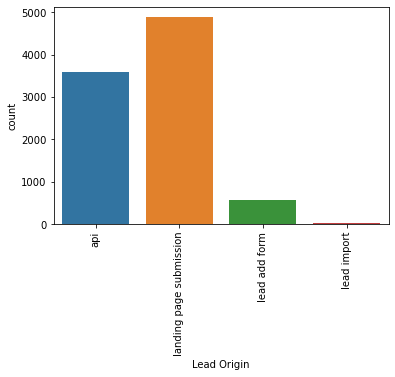

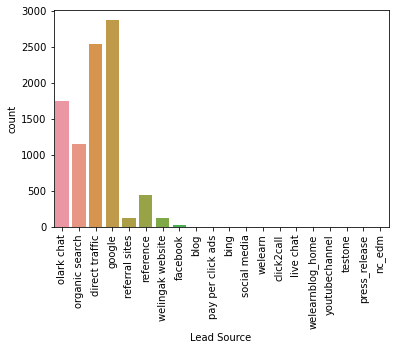

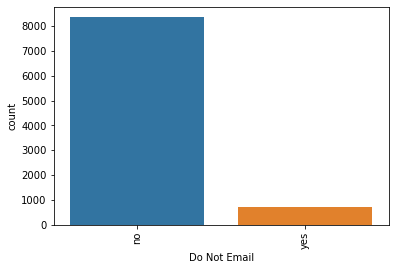

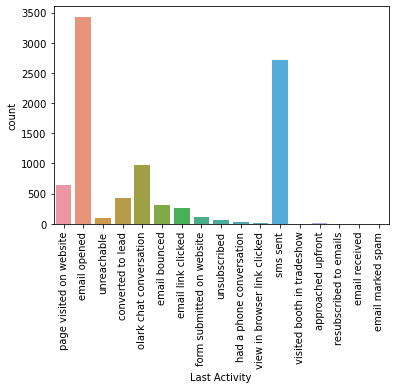

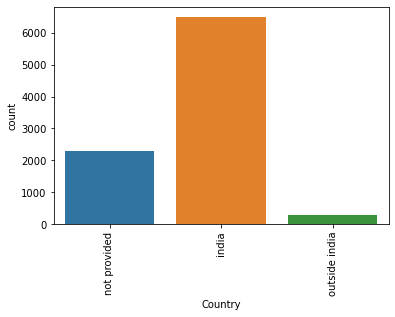

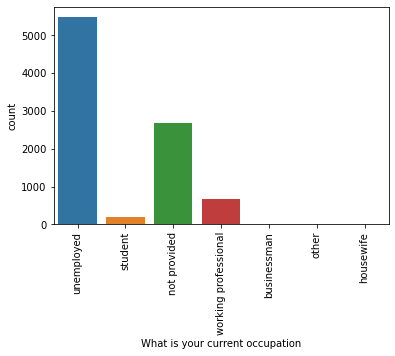

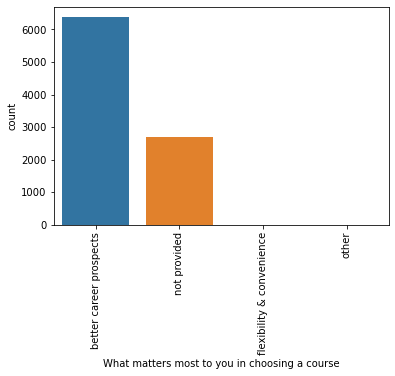

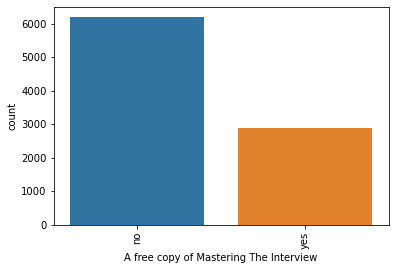

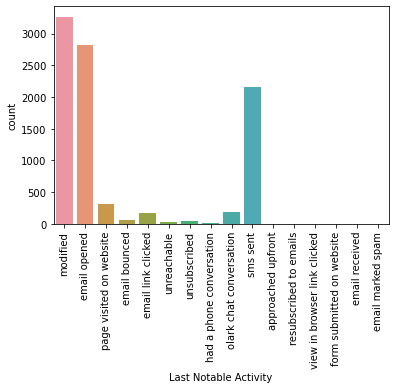

In [30]:

for i in cat_cols:
    sns.countplot(leads[i]).tick_params(axis='x', rotation = 90)
    plt.show()

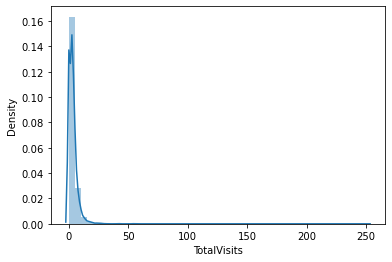

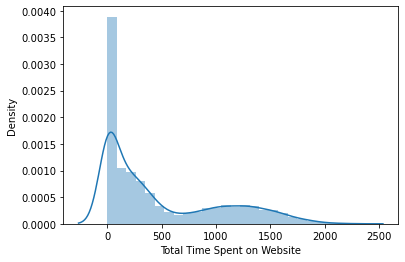

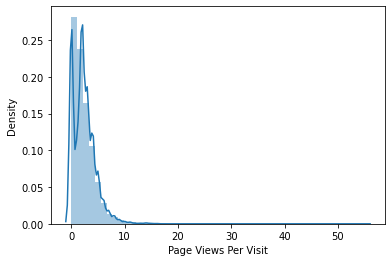

In [31]:
for i in cont_cols:
    sns.distplot(leads[i])
    plt.show()

### Bivariate Analysis

Boxplot TotalVisits vs Lead Origin


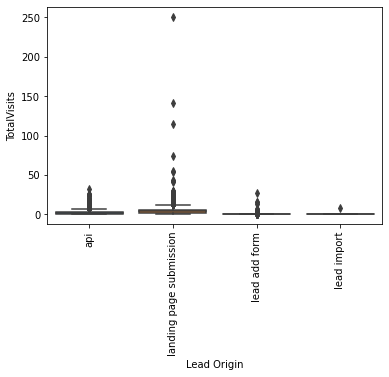

Boxplot TotalVisits vs Lead Source


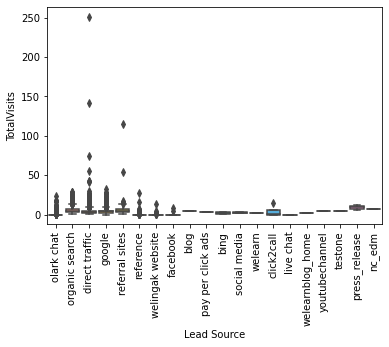

Boxplot TotalVisits vs Do Not Email


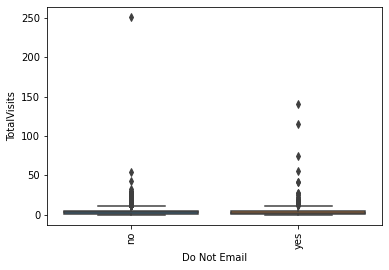

Boxplot TotalVisits vs Last Activity


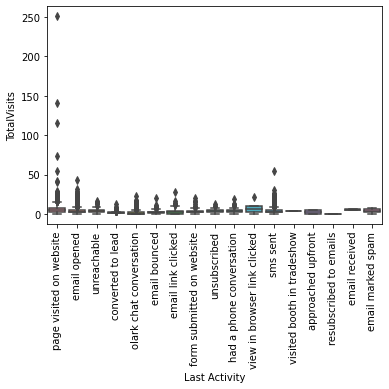

Boxplot TotalVisits vs Country


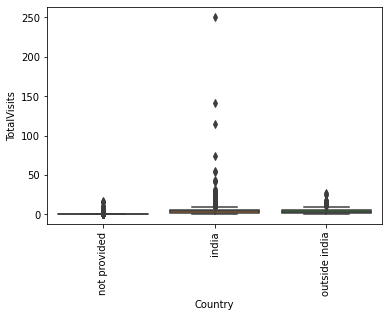

Boxplot TotalVisits vs What is your current occupation


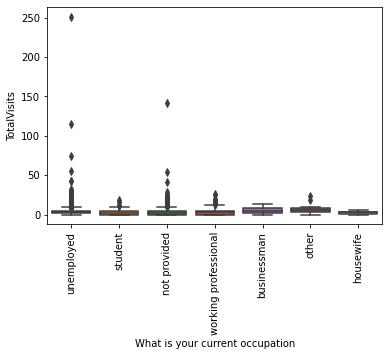

Boxplot TotalVisits vs What matters most to you in choosing a course


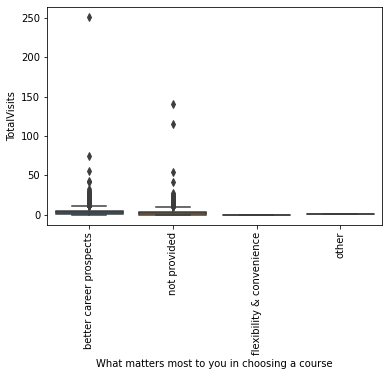

Boxplot TotalVisits vs A free copy of Mastering The Interview


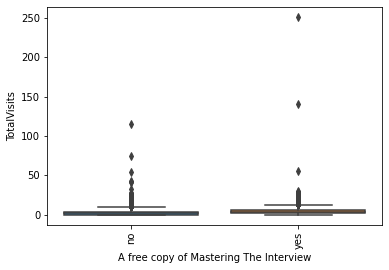

Boxplot TotalVisits vs Last Notable Activity


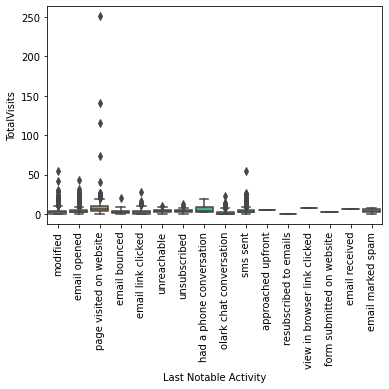

Boxplot Total Time Spent on Website vs Lead Origin


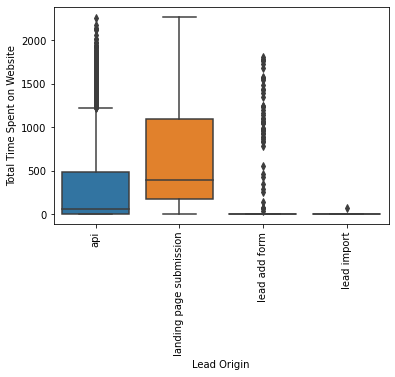

Boxplot Total Time Spent on Website vs Lead Source


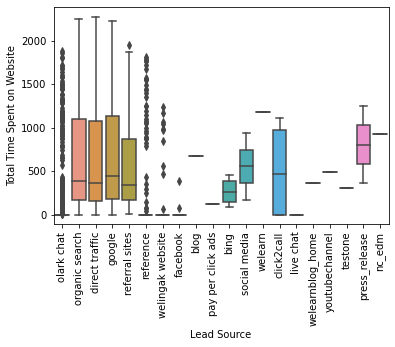

Boxplot Total Time Spent on Website vs Do Not Email


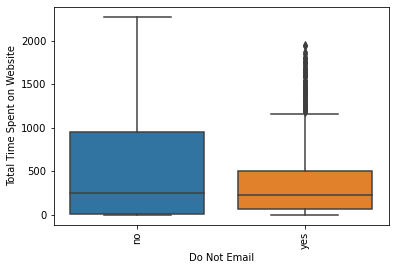

Boxplot Total Time Spent on Website vs Last Activity


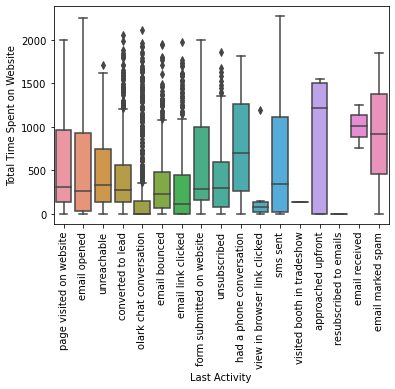

Boxplot Total Time Spent on Website vs Country


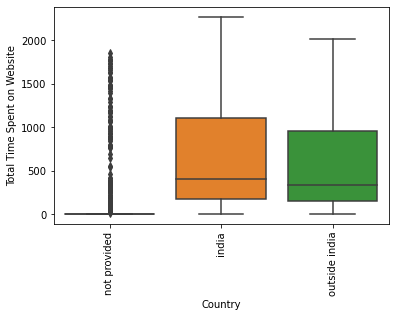

Boxplot Total Time Spent on Website vs What is your current occupation


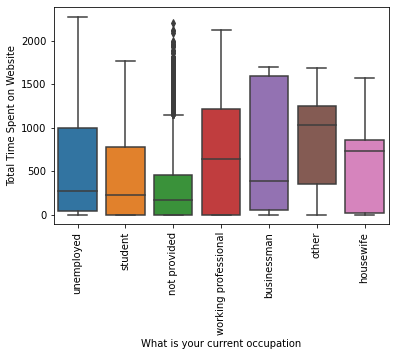

Boxplot Total Time Spent on Website vs What matters most to you in choosing a course


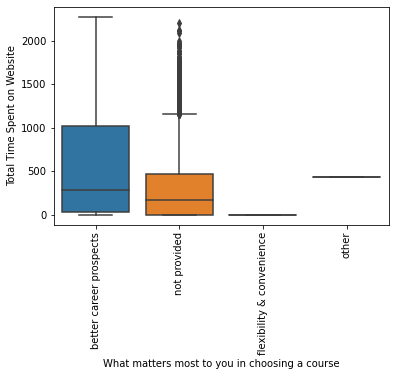

Boxplot Total Time Spent on Website vs A free copy of Mastering The Interview


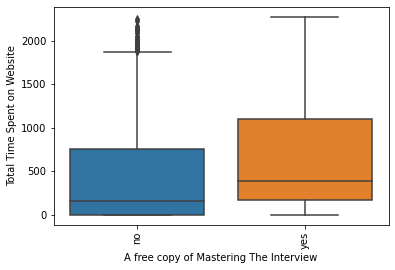

Boxplot Total Time Spent on Website vs Last Notable Activity


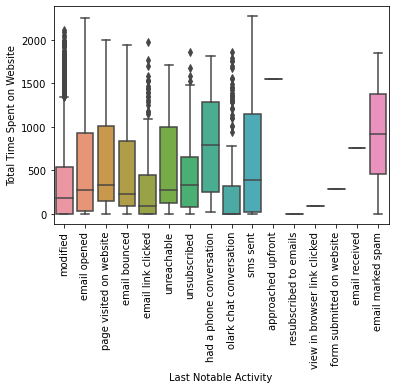

Boxplot Page Views Per Visit vs Lead Origin


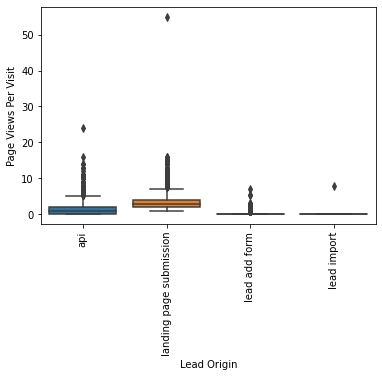

Boxplot Page Views Per Visit vs Lead Source


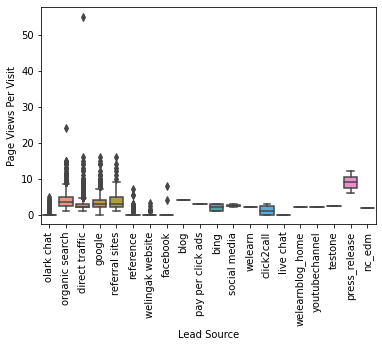

Boxplot Page Views Per Visit vs Do Not Email


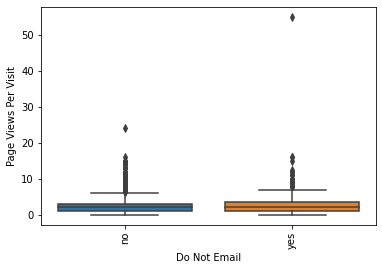

Boxplot Page Views Per Visit vs Last Activity


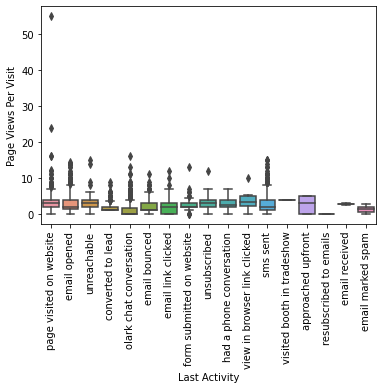

Boxplot Page Views Per Visit vs Country


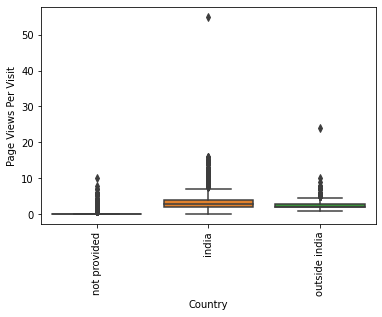

Boxplot Page Views Per Visit vs What is your current occupation


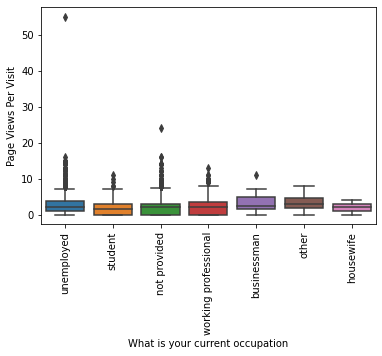

Boxplot Page Views Per Visit vs What matters most to you in choosing a course


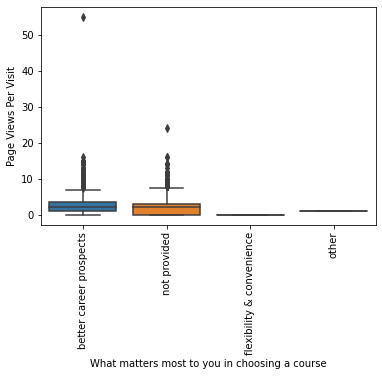

Boxplot Page Views Per Visit vs A free copy of Mastering The Interview


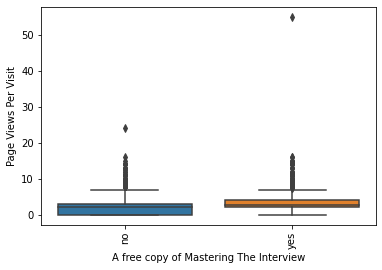

Boxplot Page Views Per Visit vs Last Notable Activity


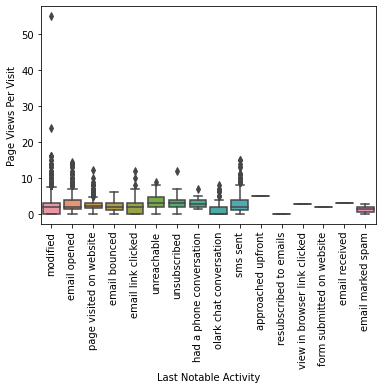

In [32]:
for i in cont_cols:
    for j in cat_cols:
        print("Boxplot",i,"vs",j)
        sns.boxplot(leads[j],leads[i]).tick_params(axis='x', rotation = 90)
        plt.show()

Countplot of  Lead Origin  vs Converted


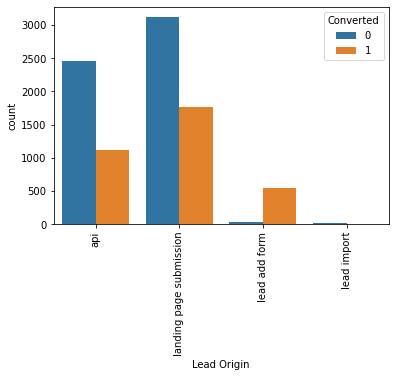

Countplot of  Lead Source  vs Converted


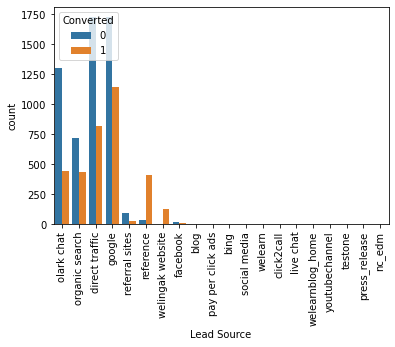

Countplot of  Do Not Email  vs Converted


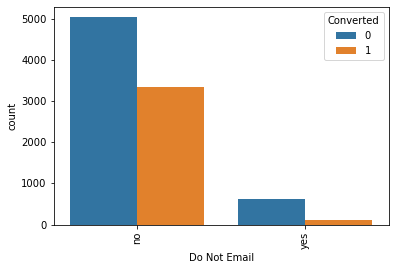

Countplot of  Last Activity  vs Converted


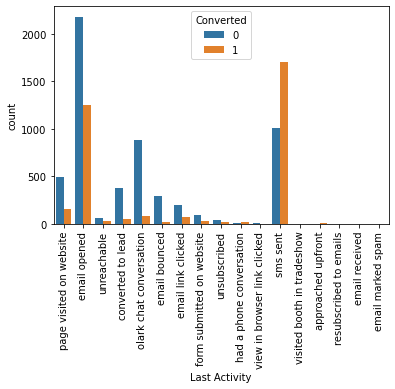

Countplot of  Country  vs Converted


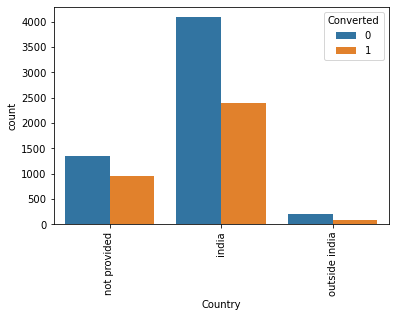

Countplot of  What is your current occupation  vs Converted


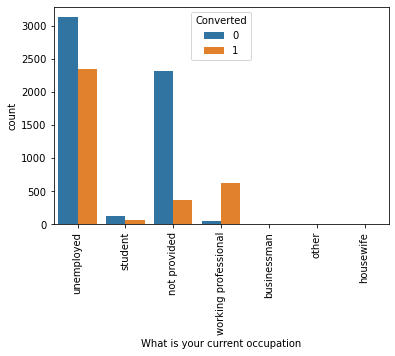

Countplot of  What matters most to you in choosing a course  vs Converted


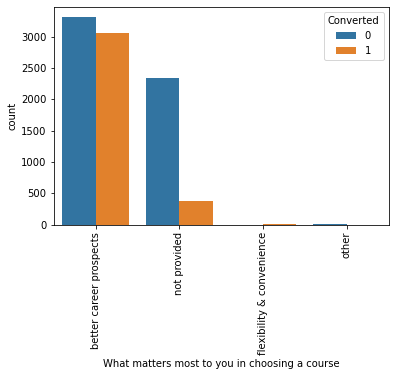

Countplot of  A free copy of Mastering The Interview  vs Converted


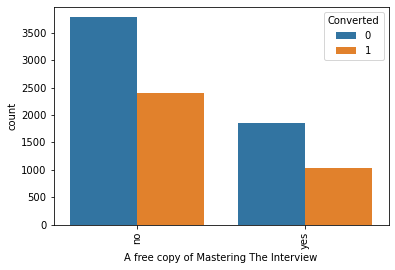

Countplot of  Last Notable Activity  vs Converted


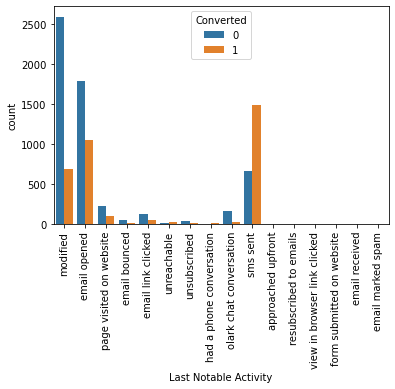

In [33]:
for j in cat_cols:
    print("Countplot of ",j," vs Converted")
    sns.countplot(x=leads[j], hue=leads['Converted']).tick_params(axis='x', rotation = 90)
    plt.show()

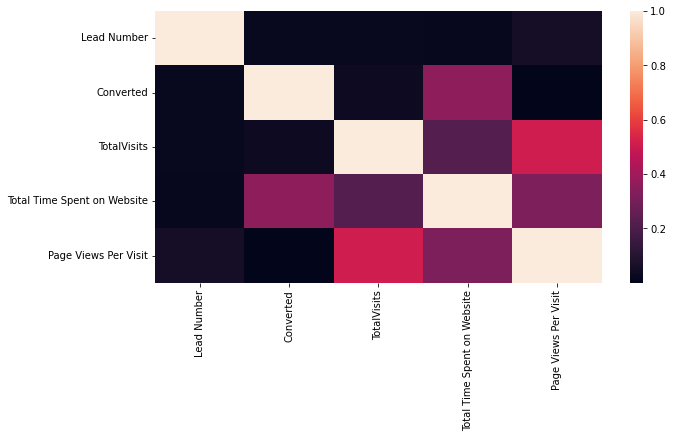

In [34]:
# Checking correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

## Data Preparation

### Dummy Variables

In [35]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [36]:
for i in leads.columns:
    print(leads[i].value_counts())

660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: Lead Number, Length: 9074, dtype: int64
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64
no     8358
yes     716
Name: Do Not Email, dtype: int64
0    5639
1    3435
Name: Converted, dtype: int64
0.0

In [37]:
leads.shape


(9074, 14)

In [38]:
 leads.nunique()

Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
What is your current occupation                     7
What matters most to you in choosing a course       4
A free copy of Mastering The Interview              2
Last Notable Activity                              16
dtype: int64

In [39]:
dummies= ['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','What is your current occupation',
          'What matters most to you in choosing a course','A free copy of Mastering The Interview','Last Notable Activity']


In [40]:
# variavle for which dummies

dummy_vars = pd.get_dummies(leads[dummies], drop_first=True)
# Add the results to the master dataframe
leads = pd.concat([leads, dummy_vars], axis=1)


In [41]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak 

In [42]:
dummies.append('Lead Number')
leads.drop(dummies, axis=1,inplace=True)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
leads.shape

(9074, 70)

In [44]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9074 non-null   int64  
 1   TotalVisits                                                              9074 non-null   float64
 2   Total Time Spent on Website                                              9074 non-null   int64  
 3   Page Views Per Visit                                                     9074 non-null   float64
 4   Lead Origin_landing page submission                                      9074 non-null   uint8  
 5   Lead Origin_lead add form                                                9074 non-null   uint8  
 6   Lead Origin_lead import                                                 

### Test Train Split

In [45]:
# Splitting the dataset in test and train datasets
from sklearn.model_selection import train_test_split
X = leads.drop(['Converted'], axis=1)
y = leads['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=101)


In [46]:
# Checking correlation coefficients to see which variables are highly correlated

# plt.figure(figsize = (30, 15))
# sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn_r")
# plt.show()

In [47]:
# Scaling the Variables
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
4735,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7653,0.047809,0.399648,0.072727,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
791,0.031873,0.220511,0.048545,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6640,0.015936,0.014085,0.072727,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8162,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building

In [48]:
# Importing the library
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

In [49]:
# Running RFE for getting 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [50]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', False, 18),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 51),
 ('Lead Source_blog', False, 52),
 ('Lead Source_click2call', False, 31),
 ('Lead Source_direct traffic', False, 26),
 ('Lead Source_facebook', False, 17),
 ('Lead Source_google', False, 29),
 ('Lead Source_live chat', False, 38),
 ('Lead Source_nc_edm', False, 54),
 ('Lead Source_olark chat', False, 37),
 ('Lead Source_organic search', False, 28),
 ('Lead Source_pay per click ads', False, 35),
 ('Lead Source_press_release', False, 46),
 ('Lead Source_reference', False, 21),
 ('Lead Source_referral sites', False, 25),
 ('Lead Source_social media', False, 43),
 ('Lead Source_testone', False, 32),
 ('Lead Source_welearn', False, 19),
 ('Lead Source_welearnblog_home', False, 45),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechanne

In [51]:
col_selected_rfe = X_train.columns[rfe.support_]

In [52]:
# Creating the first model
X_train_0=X_train[col_selected_rfe]

In [53]:
# Function to calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [54]:
calVIF(X_train_0)

,Features,VIF
7,Country_not provided,2.07
6,Last Activity_olark chat conversation,1.93
12,Last Notable Activity_modified,1.85
4,Do Not Email_yes,1.82
2,Lead Origin_lead add form,1.80
5,Last Activity_email bounced,1.78
1,Total Time Spent on Website,1.68
0,TotalVisits,1.61
11,Last Notable Activity_email opened,1.48
13,Last Notable Activity_olark chat conversation,1.35


#### Model 1

In [55]:
# Importing model library
import statsmodels.api as sm
X_train_1 = sm.add_constant(X_train_0)
logm1 = sm.GLM(y_train, X_train_1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3037.9
Date:                Tue, 15 Nov 2022   Deviance:                       6075.8
Time:                        14:01:36   Pearson chi2:                 7.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9867      0.085    -11.672      0.000      -1.152      -0.821
TotalVisits                                              7.6633      2.035      3.766      0.000       3.675      11.651
Total Time Spent on Website                              4.6090      0.156     29.514      0.000       4.303       4.915
Lead Origin_lead add form                                2.8200      0.218     12.923      0.000       2.392       3.248
Lead Source_welingak website                             2.7004      1.030      2.622      0.009       0.682       4.719
Do Not Email_yes                                        -1.3096      0.182     -7.209      0.000      -1.666      -0.954
Last Activity_email bounced                             -1.4400      0.379     -3.801      0.000      -2.183      -0.697
Last Activity_olark chat conversation                   -1.2805      0.183     -6.988      0.000      -1.640      -0.921
Country_not provided                                     1.3348      0.104     12.817      0.000       1.131       1.539
What is your current occupation_housewife               23.0410    1.7e+04      0.001      0.999   -3.32e+04    3.33e+04
What is your current occupation_working professional     2.8183      0.184     15.307      0.000       2.457       3.179
Last Notable Activity_email link clicked                -1.7789      0.241     -7.371      0.000      -2.252      -1.306
Last Notable Activity_email opened                      -1.3878      0.082    -16.942      0.000      -1.548      -1.227
Last Notable Activity_modified                          -1.7774      0.090    -19.855      0.000      -1.953      -1.602
Last Notable Activity_olark chat conversation           -1.7013      0.357     -4.759      0.000      -2.402      -1.001
Last Notable Activity_page visited on website           -1.7524      0.189     -9.270      0.000      -2.123      -1.382
========================================================================================================================
"""

In [56]:
calVIF(X_train_0)

,Features,VIF
7,Country_not provided,2.07
6,Last Activity_olark chat conversation,1.93
12,Last Notable Activity_modified,1.85
4,Do Not Email_yes,1.82
2,Lead Origin_lead add form,1.80
5,Last Activity_email bounced,1.78
1,Total Time Spent on Website,1.68
0,TotalVisits,1.61
11,Last Notable Activity_email opened,1.48
13,Last Notable Activity_olark chat conversation,1.35


In [57]:
# Dropping What is your current occupation_housewife as it has high p value
X_train_0.drop('What is your current occupation_housewife',axis=1,inplace=True)

#### Model 2

In [58]:
X_train_2 = sm.add_constant(X_train_0)
logm1 = sm.GLM(y_train, X_train_2, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3042.6
Date:                Tue, 15 Nov 2022   Deviance:                       6085.3
Time:                        14:01:37   Pearson chi2:                 7.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9829      0.084    -11.642      0.000      -1.148      -0.817
TotalVisits                                              7.5951      2.029      3.743      0.000       3.618      11.572
Total Time Spent on Website                              4.6022      0.156     29.510      0.000       4.297       4.908
Lead Origin_lead add form                                2.8542      0.218     13.095      0.000       2.427       3.281
Lead Source_welingak website                             2.6686      1.030      2.591      0.010       0.650       4.687
Do Not Email_yes                                        -1.3103      0.182     -7.212      0.000      -1.666      -0.954
Last Activity_email bounced                             -1.4383      0.379     -3.798      0.000      -2.181      -0.696
Last Activity_olark chat conversation                   -1.2781      0.183     -6.976      0.000      -1.637      -0.919
Country_not provided                                     1.3260      0.104     12.758      0.000       1.122       1.530
What is your current occupation_working professional     2.8143      0.184     15.286      0.000       2.453       3.175
Last Notable Activity_email link clicked                -1.7678      0.240     -7.362      0.000      -2.238      -1.297
Last Notable Activity_email opened                      -1.3820      0.082    -16.885      0.000      -1.542      -1.222
Last Notable Activity_modified                          -1.7762      0.089    -19.848      0.000      -1.952      -1.601
Last Notable Activity_olark chat conversation           -1.6999      0.357     -4.755      0.000      -2.401      -0.999
Last Notable Activity_page visited on website           -1.7508      0.189     -9.264      0.000      -2.121      -1.380
========================================================================================================================
"""

In [59]:
calVIF(X_train_0)

,Features,VIF
7,Country_not provided,2.07
6,Last Activity_olark chat conversation,1.93
11,Last Notable Activity_modified,1.85
4,Do Not Email_yes,1.82
2,Lead Origin_lead add form,1.79
5,Last Activity_email bounced,1.78
1,Total Time Spent on Website,1.68
0,TotalVisits,1.61
10,Last Notable Activity_email opened,1.48
12,Last Notable Activity_olark chat conversation,1.35


In [60]:
# Dropping Country Not provided
X_train_0.drop('Country_not provided',axis=1,inplace=True)

In [61]:
X_train_3 = sm.add_constant(X_train_0)
logm1 = sm.GLM(y_train, X_train_3, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3125.4
Date:                Tue, 15 Nov 2022   Deviance:                       6250.8
Time:                        14:01:37   Pearson chi2:                 7.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4865      0.071     -6.887      0.000      -0.625      -0.348
TotalVisits                                              1.5849      1.469      1.079      0.281      -1.294       4.464
Total Time Spent on Website                              3.7977      0.136     27.995      0.000       3.532       4.064
Lead Origin_lead add form                                3.6205      0.210     17.206      0.000       3.208       4.033
Lead Source_welingak website                             2.6867      1.029      2.610      0.009       0.669       4.704
Do Not Email_yes                                        -1.2895      0.176     -7.329      0.000      -1.634      -0.945
Last Activity_email bounced                             -1.3713      0.371     -3.701      0.000      -2.098      -0.645
Last Activity_olark chat conversation                   -0.7789      0.179     -4.340      0.000      -1.131      -0.427
What is your current occupation_working professional     2.7810      0.183     15.172      0.000       2.422       3.140
Last Notable Activity_email link clicked                -1.6096      0.241     -6.686      0.000      -2.081      -1.138
Last Notable Activity_email opened                      -1.3569      0.081    -16.848      0.000      -1.515      -1.199
Last Notable Activity_modified                          -1.8106      0.088    -20.616      0.000      -1.983      -1.638
Last Notable Activity_olark chat conversation           -1.7060      0.360     -4.734      0.000      -2.412      -1.000
Last Notable Activity_page visited on website           -1.6651      0.181     -9.203      0.000      -2.020      -1.311
========================================================================================================================
"""

In [62]:
calVIF(X_train_0)

,Features,VIF
4,Do Not Email_yes,1.82
5,Last Activity_email bounced,1.78
10,Last Notable Activity_modified,1.75
6,Last Activity_olark chat conversation,1.69
1,Total Time Spent on Website,1.62
0,TotalVisits,1.57
2,Lead Origin_lead add form,1.45
11,Last Notable Activity_olark chat conversation,1.34
3,Lead Source_welingak website,1.32
9,Last Notable Activity_email opened,1.31


In [63]:
# Removing totalvisits due to high p value
X_train_0.drop('TotalVisits',axis=1,inplace=True)

#### Model 4

In [64]:
X_train_4 = sm.add_constant(X_train_0)
logm1 = sm.GLM(y_train, X_train_4, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3125.9
Date:                Tue, 15 Nov 2022   Deviance:                       6251.8
Time:                        14:01:37   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4673      0.068     -6.840      0.000      -0.601      -0.333
Total Time Spent on Website                              3.8144      0.135     28.287      0.000       3.550       4.079
Lead Origin_lead add form                                3.6008      0.210     17.181      0.000       3.190       4.012
Lead Source_welingak website                             2.6863      1.029      2.610      0.009       0.669       4.704
Do Not Email_yes                                        -1.2801      0.176     -7.278      0.000      -1.625      -0.935
Last Activity_email bounced                             -1.3868      0.370     -3.744      0.000      -2.113      -0.661
Last Activity_olark chat conversation                   -0.7852      0.179     -4.380      0.000      -1.137      -0.434
What is your current occupation_working professional     2.7789      0.183     15.170      0.000       2.420       3.138
Last Notable Activity_email link clicked                -1.6076      0.241     -6.681      0.000      -2.079      -1.136
Last Notable Activity_email opened                      -1.3545      0.080    -16.829      0.000      -1.512      -1.197
Last Notable Activity_modified                          -1.8120      0.088    -20.633      0.000      -1.984      -1.640
Last Notable Activity_olark chat conversation           -1.7013      0.360     -4.727      0.000      -2.407      -0.996
Last Notable Activity_page visited on website           -1.6299      0.177     -9.185      0.000      -1.978      -1.282
========================================================================================================================
"""

In [65]:
calVIF(X_train_0)

,Features,VIF
3,Do Not Email_yes,1.79
4,Last Activity_email bounced,1.76
5,Last Activity_olark chat conversation,1.69
9,Last Notable Activity_modified,1.69
0,Total Time Spent on Website,1.48
1,Lead Origin_lead add form,1.45
10,Last Notable Activity_olark chat conversation,1.34
2,Lead Source_welingak website,1.32
8,Last Notable Activity_email opened,1.23
6,What is your current occupation_working profes...,1.16


#### Now, that all p-values are less than 0.05 and vif values are in the accepted range, Model 4 can be fixed.

## Model prediction

In [66]:
# For training dataset
y_train_pred = res.predict(X_train_4).values.reshape(-1)

In [67]:
# Creating dataframe with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

In [68]:
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.139211
1,1,0.922831
2,0,0.272745
3,0,0.145775
4,0,0.049556


In [69]:
# taking initial cutoff as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.139211,0
1,1,0.922831,1
2,0,0.272745,0
3,0,0.145775,0
4,0,0.049556,0


## Model Evaluation

In [70]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[4001,  523],
       [ 984, 1751]], dtype=int64)

In [71]:
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2)

0.79

#### Accuracy is 0.79 which is a good result

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Sensitivity
round(TP/(TP+FN),2)

0.64

In [74]:
# Specificity
round(TN/(TN+FP),2)

0.88

### ROC Curve

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

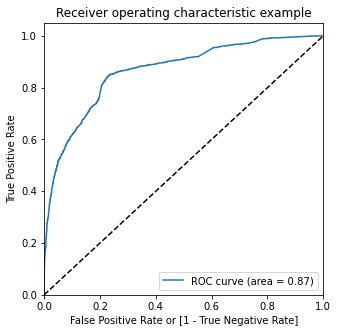

In [77]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Area under ROC curve is 0.87 which is very good

In [78]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.139211,0,1,1,0,0,0,0,0,0,0,0
1,1,0.922831,1,1,1,1,1,1,1,1,1,1,1
2,0,0.272745,0,1,1,1,0,0,0,0,0,0,0
3,0,0.145775,0,1,1,0,0,0,0,0,0,0,0
4,0,0.049556,0,1,0,0,0,0,0,0,0,0,0


In [79]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.376774,1.000000,0.000000
0.1,0.1,0.533682,0.971481,0.269010
0.2,0.2,0.744180,0.879707,0.662246
0.3,0.3,0.797217,0.844973,0.768347
0.4,0.4,0.785783,0.742596,0.811892
0.5,0.5,0.792396,0.640219,0.884394
0.6,0.6,0.789916,0.554662,0.932140
0.7,0.7,0.779171,0.485923,0.956454
0.8,0.8,0.753685,0.386106,0.975906
0.9,0.9,0.710566,0.246435,0.991158


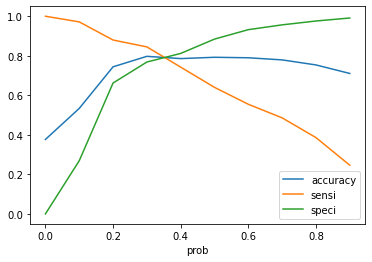

In [80]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### The cutoff probability appears to be around 0.36

In [81]:
# Taking cutoff as 0.36 and recalculating the metrics

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.139211,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.922831,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.272745,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.145775,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.049556,0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7994214079074252

In [84]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3547,  977],
       [ 479, 2256]], dtype=int64)

In [85]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Sensitivity
round(TP/(TP+FN),2)

0.82

In [87]:
# Specificity
round(TN/(TN+FP),2)

0.78

In [88]:
#  Precision
round( TP/(TP+FP),2)

0.7

In [89]:
# Recall
round(TP/(TP+FN),2)

0.82

### With cutoff as 0.36, the sensitivity is 0.82 and specificity as 0.78

## Prediction using Test Dataset

In [90]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [91]:
# Substituting all the columns in the final train model
col = X_train_0.columns

In [92]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_0 = sm.add_constant(X_test[col])
X_test_0


,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_email bounced,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
1554,1.0,0.042254,0,0,1,1,0,0,0,0,1,0,0
3056,1.0,0.417694,0,0,1,0,0,0,0,0,0,0,0
5569,1.0,0.000000,0,0,0,0,1,0,0,0,1,0,0
3022,1.0,0.000000,1,0,0,0,0,0,0,0,0,0,0
7549,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,1.0,0.540493,0,0,0,0,0,0,0,0,0,0,0
3595,1.0,0.000000,0,0,0,0,1,0,0,0,1,0,0
5002,1.0,0.164173,0,0,0,0,0,0,0,0,0,0,0
452,1.0,0.597271,0,0,0,0,0,0,0,0,1,0,0


In [93]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_0)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.008284
1,1,0.461527
2,0,0.044593
3,1,0.958252
4,0,0.385247


In [94]:
# Using 0.36 as cutoff to find evaluation metrics
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.008284,0
1,1,0.461527,1
2,0,0.044593,0
3,1,0.958252,1
4,0,0.385247,1
...,...,...,...
1810,1,0.831224,1
1811,0,0.044593,0
1812,0,0.539639,1
1813,1,0.499721,1


In [95]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8077134986225896

In [96]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[894, 221],
       [128, 572]], dtype=int64)

In [97]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [98]:
# Sensitivity
round(TP/(TP+FN),2)

0.82

In [99]:
# Specificity
round(TN/(TN+FP),2)

0.8

With cutoff of 0.36, we have sensitivity as 0.82 and specificivity as 0.8

In [100]:
# Precision
round( TP/(TP+FP),2)

0.72

In [101]:
# Recall
round(TP/(TP+FN),2)

0.82

## Conclusion

Top four features that indicates hot leads are -
    -Total Time Spent on Website
    -Lead Origin is lead add form
    -Lead Source is welingak website
    -Current occupation is Professional
    


